# Numeryczne szukanie minimum funkcji

# Numerical search for the minimum function

In [21]:
import numpy as np
import matplotlib.pyplot as plt

## Stochastic Gradient Descent (SGD)

Jest to najprostsza metoda szukania minimum funkcji $f(x)$. Argumentem funkcji w ogólności może być wektor $\overline{x}$ lub w najprostszym przypadku (rozpatrywanym teraz) liczba. Jest to metoda iteracyjna, zaczyna od pewnego punktu w przestrzeni parametrów i w każdym kroku przesuwa ten punkt w stronę wskazywaną przez gradient funkcji.

$$x_{i+1} =x_{i}-\alpha \frac{\partial f}{\partial x}(x_i)  $$

Znak minus bierze się stąd, że gradient wskazuje kierunek najszybszego rośnięcia funkcji, a chcemy szukać minimum. Parametr $\alpha$ to długość kroku, należy go dobrać odpowiednio do zagadnienia. Zbyt mała wartość może spowodować, że metoda będzie działać powoli lub utknie w minimum lokalnym, zbyt duża wartość spowoduje, że program nigdy nie znajdzie dokładnej odpowiedzi.

## Stochastic Gradient Descent (SGD)

This is the simplest method of finding the minimum $f(x)$ function. The argument of the function in general can be the $\overline{x}$ vector or in the simplest case (now considered) a number. It is an iterative method, it starts at a certain point in the parameter space and at each step shifts this point in the direction indicated by the function gradient.

$$x_{i+1} =x_{i}-\alpha \frac{\partial f}{\partial x}(x_i)  $$

The minus sign comes from the fact that the gradient indicates the direction of the fastest growth of the function, and we want to look for the minimum. The $\alpha$ parameter is the length of the step, it should be chosen according to the problem to be solved. Too small value may cause the method to work slowly or get stuck in the local minimum, too large value will cause that the program will never find the exact answer.

**1\. Funkcja kwadratowa**

Jedną z najprostszych funkcji, na których można ćwiczyć to funkcja kwadratowa $f(x)=ax^2+bx+c$.

Jej gradient wynosi $\frac{\partial f}{\partial x}=2ax+b$

Zbierając to razem dostajemy następujący wzór (nie pomylić alfy z a):

$$x_{i+1} =x_{i}-\alpha (2ax_i+b)  $$

Jako punkt początkowy $x_0$ należy wybrać losowo liczbę z przedziału [-10,10], parametr "steps" to ilość kroków optymalizacji, które ma wykonać program. Jako długość kroku $\alpha$ można wziąć na początek 0.01.

Funkcja SGD1 powinna zwrócić wartość x dla którego $f(x)$ ma minimum.

**1 \. Quadratic function**

One of the simplest functions you can practice is the square function $f(x)=ax^2+bx+c$.

Its gradient is $\frac{\partial f}{\partial x}=2ax+b$

Collecting this together we get the following formula (do not confuse the alpha with a):

$$x_{i+1} =x_{i}-\alpha (2ax_i+b)  $$

As the starting point of $x_0$, randomly select a number from the range [-10.10], the "steps" parameter is the number of optimization steps that the program is to perform. You can take 0.01 at the beginning of the $\alpha$ step length.

SGD1 should return x for which $f(x)$ has a minimum.

In [22]:
def SGD1(a, b, c, steps):
    ### BEGIN SOLUTION
    alfa = 0.001
    x = -10 + 20 * np.random.uniform()
    for i in range(0, steps):
        grad = 2 * a * x + b
        x = x - alfa * grad
    return x
    ### END SOLUTION


In [23]:
np.testing.assert_almost_equal(SGD1(2, -3, 1, 10000), 0.75)
np.testing.assert_almost_equal(SGD1(2, 2, 1.23, 10000), -0.5)

### BEGIN HIDDEN TESTS
np.testing.assert_almost_equal(SGD1(5.64, 2.36, 0, 10000), -2.36 / (2 * 5.64))
np.testing.assert_almost_equal(SGD1(2.45, 34.31, 1, 10000), -34.31 / (2 * 2.45))
### END HIDDEN TESTS

**2\. Regresja liniowa**

Regresja liniowa to metoda znajdowania parametrów prostej $y=ax+b$ która najlepiej opisuje dane. Najczęściej robi się to [metodą najmniejszych kwadratów](https://pl.wikipedia.org/wiki/Metoda_najmniejszych_kwadrat%C3%B3w), która polega na zminimalizowaniu następującej funkcji:

$$L(a,b)=\sum_{j=0}^{n-1} (y_j-ax_j-b)^2$$

gdzie $x_i,y_i$ to odpowiednia para danych do których dopasowujemy prostą.

Gradient L ze względu na a i b jest równy:

$$\frac{\partial L}{\partial a}=-2\sum_{j=0}^{n-1}(y_j-ax_j-b)x_j$$
$$\frac{\partial L}{\partial b}=-2\sum_{j=0}^{n-1}(y_j-ax_j-b)$$

Tym razem równania wyglądają następująco
$$a_{i+1}=a_i-\alpha\frac{\partial L}{\partial a}=a_i+2\alpha\sum_{j=0}^{n-1}(y_j-ax_j-b)x_j$$
$$b_{i+1}=b_i-\alpha\frac{\partial L}{\partial b}=b_i+2\alpha\sum_{j=0}^{n-1}(y_j-ax_j-b)$$


Funksja SGD_reglin powinna zwrócić np.array z wartościami znalezionych a i b

**2 \. Linear regression**

Linear regression is a method of finding the $y=ax+b$ straight line parameters that best describes the data. Most often it is done [least squares method] (https://en.wikipedia.org/wiki/Least_squares), which consists in minimizing the following function:

$$L(a,b)=\sum_{j=0}^{n-1} (y_j-ax_j-b)^2$$

where $x_i,y_i$ is the right data pair for which we match the straight line.

The gradient L due to a and b is equal to:

$$\frac{\partial L}{\partial a}=-2\sum_{j=0}^{n-1}(y_j-ax_j-b)x_j$$
$$\frac{\partial L}{\partial b}=-2\sum_{j=0}^{n-1}(y_j-ax_j-b)$$

This time the equations look like this
$$a_{i+1}=a_i-\alpha\frac{\partial L}{\partial a}=a_i+2\alpha\sum_{j=0}^{n-1}(y_j-ax_j-b)x_j$$
$$b_{i+1}=b_i-\alpha\frac{\partial L}{\partial b}=b_i+2\alpha\sum_{j=0}^{n-1}(y_j-ax_j-b)$$


The SGD_reglin function should return np.array with values of found a and b

In [24]:
# Generowanie danych do regresji liniowej
def genData(n, a, b, useNoise):
    result = np.zeros((n, 2)) #x_i=result[i][0], y_i=result[i][1]
    for i in range(0, n):
        x = -10 + 20 * np.random.uniform()
        result[i][0] = x
        result[i][1] = a * x + b
        if useNoise == True:
            result[i][1] += 0.1 * np.random.normal()
    return result

data_reglin1 = genData(100, 2, -3, False)
data_reglin2 = genData(100, 0.123, 1.4142, True)

answer_reglin1 = np.polyfit(data_reglin1[:,0], data_reglin1[:,1],1)
answer_reglin2 = np.polyfit(data_reglin2[:,0], data_reglin2[:,1],1)
print(answer_reglin1)
print(answer_reglin2)

[ 2. -3.]
[0.1254687  1.41617193]


In [25]:
def SGD_reglin(data, alfa, steps):
    a = 0.0
    b = 0.0
    x = data[:,0]
    y = data[:,1]
    ### BEGIN SOLUTION
    for i in range(steps):
        grad_a = np.dot(y - a * x - b, x) 
        grad_b = np.sum(y - a * x - b)
        a += 2 * alfa * grad_a
        b += 2 * alfa * grad_b
    return np.array((a, b))
    ### END SOLUTION
    
print(SGD_reglin(data_reglin1, 0.0001, 10000))
print(SGD_reglin(data_reglin2, 0.0001, 10000))


[ 2. -3.]
[0.1254687  1.41617193]


In [26]:
answer_reglin1=np.polyfit(data_reglin1[:,0],data_reglin1[:,1],1)
answer_reglin2=np.polyfit(data_reglin2[:,0],data_reglin2[:,1],1)
np.testing.assert_almost_equal(SGD_reglin(data_reglin1,0.0001,10000),np.array(answer_reglin1))
np.testing.assert_almost_equal(SGD_reglin(data_reglin2,0.0001,10000),np.array(answer_reglin2))

### BEGIN HIDDEN TESTS
data_reglin3=genData(100,-0.12,0.24,True)
answer_reglin3=np.polyfit(data_reglin3[:,0],data_reglin3[:,1],1)
np.testing.assert_almost_equal(SGD_reglin(data_reglin3,0.0001,10000),np.array(answer_reglin3))
### END HIDDEN TESTS

**3\. Funkcja Rosenbrocka**

Zadanie polega na znalezieniu minimum następującej funkcji $f(x,y)=(a-x)^2+b(y-x^2)^2$.


Funkcja SGD_rosenbrok powinna zwrócić np.array z wartościami znalezionych x i y. Zacznij od losowo wybranych $x_0, y_0 \in [-a,a]$.

**3 \. Rosenbrock function**

The task is to find the minimum of the following $f(x,y)=(a-x)^2+b(y-x^2)^2$ function.


The SGD_rosenbrok function should return np.array with values of found x and y. Start with randomly selected $x_0, y_0 \in [-a,a]$.

In [27]:
def SGD_rosenbrock(a, b, alfa, steps):
    ### BEGIN SOLUTION
    x = -a + 2 * a * np.random.uniform()
    y = -a + 2 * a * np.random.uniform()
    for i in range(steps):
        grad_x = -2 * (a - x) + 2 * b * (y - x**2) * (-2 * x)
        grad_y = 2 * b * (y - x**2)
        x -= alfa * grad_x
        y -= alfa * grad_y
    return np.array((x, y))
    ### END SOLUTION


In [28]:
np.testing.assert_almost_equal(SGD_rosenbrock(-1, 100, 0.001, 1000000),np.array((-1, 1)))

### BEGIN HIDDEN TESTS
np.testing.assert_almost_equal(SGD_rosenbrock(0.7, 20, 0.001, 1000000),np.array((0.7, 0.49)))
### END HIDDEN TESTS

**4\. Fitowanie wielomianu**

Tym razem należy dopasować wielomian p(x) stopnia $N$.

$$L(\overline{a})=\sum_{i=0}^{n-1} (y_i-p(x_i))^2$$
$$p(x)=\sum_{j=0}^{N} a_j x^j$$

Gradient L ze względu na $a_j$ jest równy:

$$\frac{\partial L}{\partial a_j}=-2\sum_{i=0}^{n-1}(y_i-p(x_i))x_i^j$$


Funkcja SGD_polyfit powinna zwrócić np.array z wartościami znalezionych współczynników $a_0, a_1, a_2...$ 

**4 \. Polynomial fitting**

This time it is necessary to match the p(x) polynomial of degree $N$.

$$L(\overline{a})=\sum_{i=0}^{n-1} (y_i-p(x_i))^2$$
$$p(x)=\sum_{j=0}^{N} a_j x^j$$

The gradient of L due to $a_j$ is equal to:

$$\frac{\partial L}{\partial a_j}=-2\sum_{i=0}^{n-1}(y_i-p(x_i))x_i^j$$


The SGD_polyfit function should return np.array with values of the found $a_0, a_1, a_2...$ coefficients

In [29]:
# Generowanie danych do następnych zadań
tmp_x = np.arange(-1, 1, 0.25)
tmp_y = np.polynomial.polynomial.polyval(tmp_x,np.array((-0.1, 0.4, -0.5)))
data_polyfit = np.zeros((len(tmp_x), 2))
for i in range(len(tmp_x)):
    data_polyfit[i][0] = tmp_x[i]
    data_polyfit[i][1] = tmp_y[i] + np.random.uniform(-0.1, 0.1)
answer_polyfit=np.polyfit(data_polyfit[:,0],data_polyfit[:,1],2)
answer_polyfit=answer_polyfit[::-1]

print(answer_polyfit)

[-0.09673785  0.41579835 -0.46520465]


In [30]:
def SGD_polyfit(data, N, alfa, steps):
    ### BEGIN SOLUTION
    a = np.zeros(N + 1)
    grad_a = np.zeros(N + 1)
    x = data[:,0]
    y = data[:,1]
    for i in range(steps):
        tmp = y - np.polynomial.polynomial.polyval(x, a)
        for j in range(N+1):
            grad_a[j] = -2 * np.dot(tmp, x**j) 
        a -= alfa * grad_a
    return a
    ### END SOLUTION

In [31]:
out = SGD_polyfit(data_polyfit, 2, 0.001, 250000)
print(out)

[-0.09673785  0.41579835 -0.46520465]


In [32]:
np.testing.assert_almost_equal(int(round(100*out[0])), int(round(100*answer_polyfit[0])))
np.testing.assert_almost_equal(int(round(100*out[1])), int(round(100*answer_polyfit[1])))
np.testing.assert_almost_equal(int(round(100*out[2])), int(round(100*answer_polyfit[2])))

### W poniższych komórkach można zobaczyć efekt fitowania wielomianu stopnia 10 do 8 punktów danych oraz porównać wynik z prawidłowym.

### In the cells below, you can see the effect of fitting a polynomial of 10th degree to 8 data points and compare the result with the correct one.

In [33]:
pol = SGD_polyfit(data_polyfit, 10, 0.0005, 200000)
print(pol)

[-0.11084986  0.40591741 -0.35675878 -0.24885902 -0.16921213  0.31095526
  0.03792852  0.23728477  0.14844203  0.05991626  0.2071417 ]


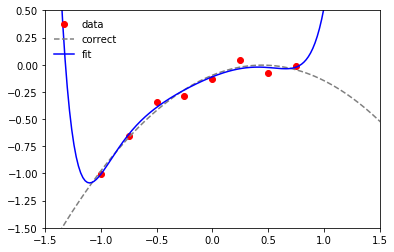

In [34]:
iksy = np.arange(-4, 4, 0.02)
igreki = np.polynomial.polynomial.polyval(iksy, pol)

plt.axis([-1.5, 1.5, -1.5, 0.5])
plt.plot(data_polyfit[:,0],data_polyfit[:,1],'o', color='red', label='data')
plt.plot(iksy, np.polynomial.polynomial.polyval(iksy, answer_polyfit), '--', color='gray', label='correct')
plt.plot(iksy, igreki, '-', color='blue', label='fit')
plt.legend(loc='upper left', frameon=False)
plt.show()

## Regularyzacja L2

Jak widać w poprzednim zadaniu, próba dopasowania wielomianu o zbyt dużym stopniu do zbyt małej ilości danych prowadzi do przefitowania. Przefitowanie jest częstym problemem w zastosowaniach uczenia maszynowego. Najprostszym rozwiązaniem jest zwiększenie ilości danych, co jednak nie zawsze jest możliwe (a czasami nawet to nie pomaga). Inną metodą jest regularyzacja L2. Polega ona na dodaniu dodatkowego członu do funkcji błędu, który wymusza stosowanie małych wartości parametrów.

$$L(\overline{a})=\sum_{i=0}^{n-1} (y_i-p(x_i))^2 + \eta \sum_{j=0}^{N} a_{j}^2 $$

gdzie $N$ to stopień wielomianu.

Zmieniony gradient L ze względu na $a_j$ jest równy:

$$\frac{\partial L}{\partial a_j}=-2\sum_{i=0}^{n-1}(y_i-p(x_i))x_i^j+ \eta a_j$$

Na początek można wziąć $\eta=10^{-4}$ i stopniowo zwiększać. Zauważ, że dla $\eta=0$ program powinien zwracać dokładnie te same wyniki co w poprzednim zadaniu.


## L2 regularization

As you can see in the previous task, attempting to fit a polynomial with too high degree to too little data leads to overfitting. Overfitting is a common problem in machine learning applications. The simplest solution is to increase the amount of data which, however, is not always possible (and sometimes even it does not help). L2 regularization is another method. It consists in adding an additional element to the error function, which forces the use of small parameter values.

$$L(\overline{a})=\sum_{i=0}^{n-1} (y_i-p(x_i))^2 + \eta \sum_{j=0}^{N} a_{j}^2 $$

where $N$ is the degree of polynomial.

The changed gradient of L due to $a_j$ is equal to:

$$\frac{\partial L}{\partial a_j}=-2\sum_{i=0}^{n-1}(y_i-p(x_i))x_i^j+ \eta a_j$$

To start with, you can take $\eta=10^{-4}$ and increase it gradually. Note that for $\eta=0$ the program should return exactly the same results as in the previous task.

In [35]:
def SGD_polyfit_L2(data, N, alfa, steps, eta):
    ### BEGIN SOLUTION
    a = np.zeros(N + 1)
    grad_a = np.zeros(N + 1)
    x = data[:, 0]
    y = data[:, 1]
    for i in range(steps):
        tmp = y - np.polynomial.polynomial.polyval(x, a)
        for j in range(N+1):
            grad_a[j] = -2 * np.dot(tmp, x**j) + eta * a[j]
        a -= alfa * grad_a
    return a
    ### END SOLUTION

In [36]:
pol_L2 = SGD_polyfit_L2(data_polyfit, 10, 0.0005, 200000, 0.25)
print(pol_L2)

[-0.13344969  0.31840663 -0.22800771  0.09484668 -0.11468935  0.05241231
 -0.04769173  0.02027704 -0.01155401 -0.00168399  0.0082387 ]


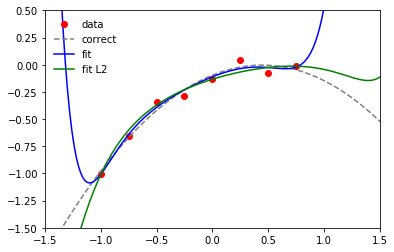

In [37]:
iksy = np.arange(-2, 2, 0.02)
igreki = np.polynomial.polynomial.polyval(iksy, pol)
igreki_L2 = np.polynomial.polynomial.polyval(iksy, pol_L2)
plt.axis([-1.5, 1.5, -1.5, 0.5])

plt.plot(data_polyfit[:,0],data_polyfit[:,1],'o', color='red', label='data')
plt.plot(iksy,np.polynomial.polynomial.polyval(iksy,answer_polyfit),'--',color='gray', label='correct')
plt.plot(iksy,igreki,'-',color='blue', label='fit')
plt.plot(iksy,igreki_L2,'-',color='green', label='fit L2')
plt.legend(loc='upper left', frameon=False)
plt.show()

In [38]:
out_noL2 = SGD_polyfit_L2(data_polyfit, 8, 0.0005, 200000, 0.0)
out_L2 = SGD_polyfit_L2(data_polyfit, 8, 0.0005, 200000, 0.5)
np.testing.assert_array_less(np.dot(out_L2, out_L2), np.dot(out_noL2, out_noL2))
